In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np

import sys
sys.path.append('../')  # Add the parent folder to the Python path

from sql_functions import get_dataframe  # Import the function

main_cities = [
    'New York, NY',
    'Washington, DC',
    'Philadelphia, PA',
]

In [4]:
query_2016 = '''
	SELECT * 
	FROM group3.full_weather
	WHERE city_name IN ('New York, NY', 'Washington, DC', 'Philadelphia, PA')
	AND date >= '2016-01-22'::timestamp
	AND date <= '2016-01-28'::timestamp;
'''

weather_2016 = get_dataframe(query_2016)
weather_2016.drop(columns=['min_temp_°C', 'max_temp_°C'], inplace=True)
weather_2016.dropna()
daily_averages_2016 = weather_2016[['date','avg_temp_°C', 'preciptation_mm', 'snowdepth_mm', 'avg_windspeed_kmh']].groupby('date').mean()

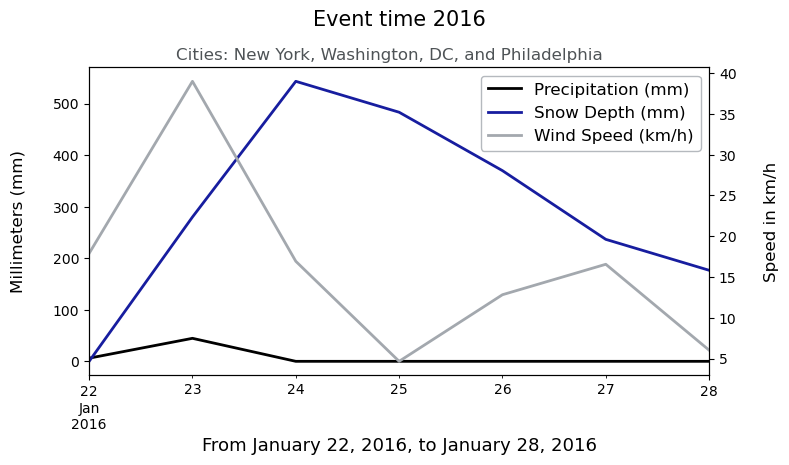

In [5]:
# Plotting the bar chart
plt.figure(figsize=(8, 4))

# Create a subplot with 1 row and 1 column
ax1 = plt.subplot(111)

# Plot the daily averages over time for precipitation
line1 = daily_averages_2016['preciptation_mm'].plot(ax=ax1, label='Precipitation (mm)', color='#000', linewidth=2.0)

# Plot the daily averages over time for snow depth
line2 = daily_averages_2016['snowdepth_mm'].plot(label='Snow Depth (mm)', color='#171d9f', linewidth=2.0)

# Set label for primary y-axis (left side)
ax1.set_ylabel('Millimeters (mm)', fontsize=12, labelpad=20)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Speed in km/h', fontsize=12, labelpad=20)

# Plot the daily averages over time for wind speed on secondary y-axis
line3 = daily_averages_2016['avg_windspeed_kmh'].plot(ax=ax2, label='Wind Speed (km/h)', color='#A3A8AE', linewidth=2.0)

# Set x-axis label
ax1.set_xlabel('From January 22, 2016, to January 28, 2016', fontsize=13)

# Get handles and labels for all lines
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels
handles = handles1 + handles2
labels = labels1 + labels2

# Create legend
legend = plt.legend(handles, labels, fontsize='large')

# Set the border around the legend box
legend.get_frame().set_edgecolor('#A3A8AE')
legend.get_frame().set_linewidth(1)

# Set title
plt.suptitle('Cities: New York, Washington, DC, and Philadelphia',
             color='#4E5356', y=0.93)
plt.title('Event time 2016', fontsize=15, pad=30)

# Show the plot
plt.show()

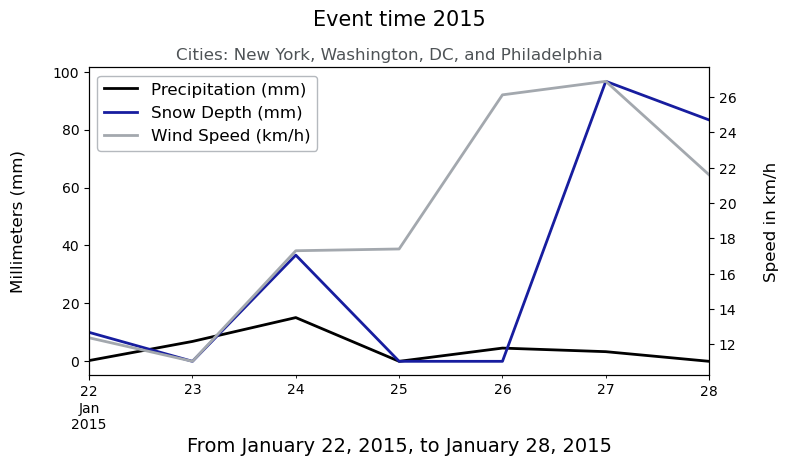

In [7]:
query_2015 = '''
	SELECT * 
	FROM group3.full_weather
	WHERE city_name IN ('New York, NY', 'Washington, DC', 'Philadelphia, PA')
	AND date >= '2015-01-22'::timestamp
	AND date <= '2015-01-28'::timestamp;
'''

weather_2015 = get_dataframe(query_2015)
weather_2015.drop(columns=['min_temp_°C', 'max_temp_°C'], inplace=True)
weather_2015.dropna()
daily_averages_2015 = weather_2015[['date','avg_temp_°C', 'preciptation_mm', 'snowdepth_mm', 'avg_windspeed_kmh']].groupby('date').mean()

# Plotting the bar chart
plt.figure(figsize=(8, 4))

# Create a subplot with 1 row and 1 column
ax1 = plt.subplot(111)

# Plot the daily averages over time for precipitation
line1 = daily_averages_2015['preciptation_mm'].plot(ax=ax1, label='Precipitation (mm)', color='#000', linewidth=2.0)

# Plot the daily averages over time for snow depth
line2 = daily_averages_2015['snowdepth_mm'].plot(label='Snow Depth (mm)', color='#171d9f', linewidth=2.0)

# Set label for primary y-axis (left side)
ax1.set_ylabel('Millimeters (mm)', fontsize=12, labelpad=20)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Speed in km/h', fontsize=12, labelpad=20)

# Plot the daily averages over time for wind speed on secondary y-axis
line3 = daily_averages_2015['avg_windspeed_kmh'].plot(ax=ax2, label='Wind Speed (km/h)', color='#A3A8AE', linewidth=2.0)

# Set x-axis label
ax1.set_xlabel('From January 22, 2015, to January 28, 2015', fontsize=14)

# Get handles and labels for all lines
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels
handles = handles1 + handles2
labels = labels1 + labels2

# Create legend
legend = plt.legend(handles, labels, fontsize='large')

# Set the border around the legend box
legend.get_frame().set_edgecolor('#A3A8AE')
legend.get_frame().set_linewidth(1)

# Set title
plt.suptitle('Cities: New York, Washington, DC, and Philadelphia',
             color='#4E5356', y=0.93)
plt.title('Event time 2015', fontsize=15, pad=30)

# Show the plot
plt.show()

In [7]:
weather_2015.describe()

,avg_temp_°C,preciptation_mm,snowdepth_mm,avg_windspeed_kmh,year,month,day
count,21.000000,21.000000,21.000000,21.000000,21.0,21.0,21.00000
mean,1.023810,4.304762,32.380952,18.961905,2015.0,1.0,25.00000
std,3.017765,6.223301,71.896089,6.808853,0.0,0.0,2.04939
min,-4.700000,0.000000,0.000000,7.900000,2015.0,1.0,22.00000
25%,-0.600000,0.000000,0.000000,13.300000,2015.0,1.0,23.00000
50%,1.300000,0.300000,0.000000,18.400000,2015.0,1.0,25.00000
75%,3.700000,7.900000,30.000000,23.800000,2015.0,1.0,27.00000
max,6.400000,19.100000,250.000000,30.600000,2015.0,1.0,28.00000


In [8]:
weather_2016.describe()

,avg_temp_°C,preciptation_mm,snowdepth_mm,avg_windspeed_kmh,year,month,day
count,21.000000,21.000000,21.000000,21.000000,21.0,21.0,21.00000
mean,0.061905,7.252381,298.571429,16.276190,2016.0,1.0,25.00000
std,3.324827,17.881237,205.141066,10.882183,0.0,0.0,2.04939
min,-3.700000,0.000000,0.000000,3.600000,2016.0,1.0,22.00000
25%,-2.700000,0.000000,150.000000,6.800000,2016.0,1.0,23.00000
50%,-1.000000,0.000000,300.000000,15.500000,2016.0,1.0,25.00000
75%,3.700000,0.300000,430.000000,18.400000,2016.0,1.0,27.00000
max,5.900000,73.700000,710.000000,40.300000,2016.0,1.0,28.00000


In [9]:
# Calculate the average snow depth for each year
average_snowdepth_2015 = weather_2015['avg_windspeed_kmh'].mean()
average_snowdepth_2016 = weather_2016['avg_windspeed_kmh'].mean()

# Calculate the percentage increase in snow depth from 2015 to 2016
percentage_increase = (((average_snowdepth_2016 - average_snowdepth_2015) / average_snowdepth_2015) * 100)

# Round the percentage increase to 2 decimal places
percentage_increase_rounded = round(percentage_increase, 2)

print("Percentage increase in wind speed from 2015 to 2016:", percentage_increase_rounded, "%")


Percentage increase in wind speed from 2015 to 2016: -14.16 %


In [10]:
# Calculate the maximum wind speed for each year
max_windspeed_2015 = weather_2015['avg_windspeed_kmh'].max()
max_windspeed_2016 = weather_2016['avg_windspeed_kmh'].max()

# Print the maximum wind speed for each year
print("Maximum wind speed in 2015:", max_windspeed_2015, "km/h")
print("Maximum wind speed in 2016:", max_windspeed_2016, "km/h")

Maximum wind speed in 2015: 30.6 km/h
Maximum wind speed in 2016: 40.3 km/h


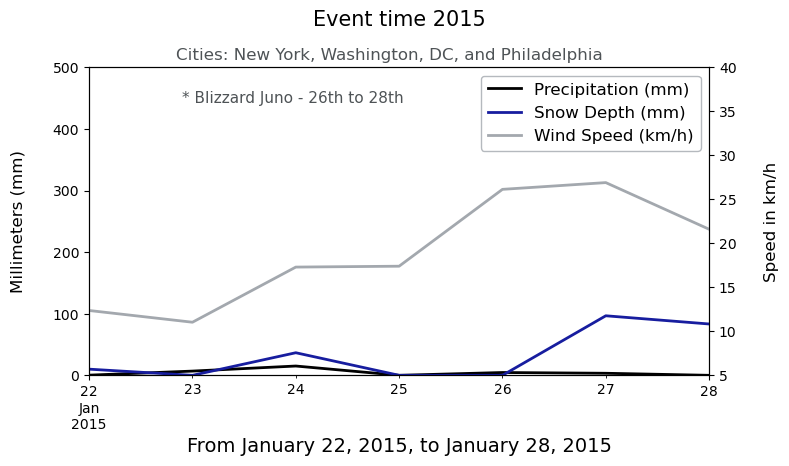

In [19]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(8, 4))

# Create a subplot with 1 row and 1 column
ax1 = plt.subplot(111)

# Plot the daily averages over time for precipitation
line1 = daily_averages_2015['preciptation_mm'].plot(ax=ax1, label='Precipitation (mm)', color='#000', linewidth=2.0)

# Plot the daily averages over time for snow depth
line2 = daily_averages_2015['snowdepth_mm'].plot(label='Snow Depth (mm)', color='#171d9f', linewidth=2.0)

# Set label for primary y-axis (left side)
ax1.set_ylabel('Millimeters (mm)', fontsize=12, labelpad=20)

# Set the range for the left y-axis
ax1.set_ylim(0, 500)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Speed in km/h', fontsize=12, labelpad=20)

# Plot the daily averages over time for wind speed on secondary y-axis
line3 = daily_averages_2015['avg_windspeed_kmh'].plot(ax=ax2, label='Wind Speed (km/h)', color='#A3A8AE', linewidth=2.0)

# Set the range for the right y-axis
ax2.set_ylim(5, 40)

# Set x-axis label
ax1.set_xlabel('From January 22, 2015, to January 28, 2015', fontsize=14)

# Get handles and labels for all lines
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels
handles = handles1 + handles2
labels = labels1 + labels2

# Create legend
legend = plt.legend(handles, labels, fontsize='large')

# Set the border around the legend box
legend.get_frame().set_edgecolor('#A3A8AE')
legend.get_frame().set_linewidth(1)

# Set title
plt.suptitle('Cities: New York, Washington, DC, and Philadelphia',
             color='#4E5356', y=0.93)
plt.title('Event time 2015', fontsize=15, pad=30)
plt.text(0.15, 0.90, '* Blizzard Juno - 26th to 28th',  horizontalalignment='left', verticalalignment='center',transform=plt.gca().transAxes, color='#4E5356', fontsize=11)

# Show the plot
plt.show()
